In [70]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data.csv"  #file name 

In [71]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance
0,0,14.469,14.469,0.0,-325.441,87.853
1,1,35.023,35.023,0.0,-78.082,42.292
2,2,19.133,19.133,0.0,-288.960,80.511
3,3,20.948,20.948,0.0,-226.304,76.192
4,4,14.794,14.794,0.0,-306.760,86.699


In [72]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [73]:
failed = data_test[data_test['Stop_Distance'] <= 0]
passed = data_test[data_test['Stop_Distance'] > 0]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

failed.to_csv("crashed.csv")
failed.head()

Size of crashes : 0
Size of success : 91855
Percentage of crash cases:0.00 %
Percentage of not crashed cases:100.00 %


,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance


In [74]:
passed.to_csv("not_crashed.csv")
passed.head()

,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance
0,0,14.469,14.469,0.0,-325.441,87.853
1,1,35.023,35.023,0.0,-78.082,42.292
2,2,19.133,19.133,0.0,-288.960,80.511
3,3,20.948,20.948,0.0,-226.304,76.192
4,4,14.794,14.794,0.0,-306.760,86.699


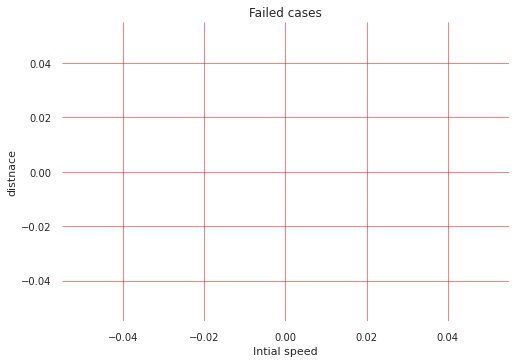

In [75]:
plt.scatter(failed["NN_start_speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

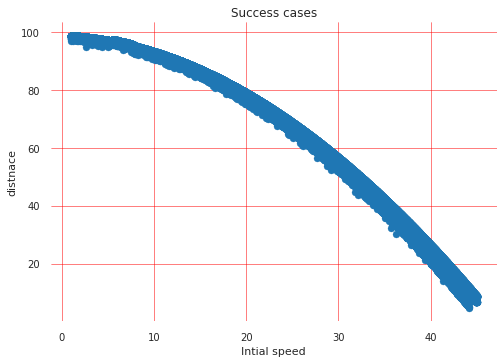

In [76]:
plt.scatter(passed["NN_start_speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

In [77]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(0)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(1)
data_test.head()

,Episode,Kick_Speed,NN_start_speed,CRS_speed,Rewards,Stop_Distance,test
0,0,14.469,14.469,0.0,-325.441,87.853,1.0
1,1,35.023,35.023,0.0,-78.082,42.292,1.0
2,2,19.133,19.133,0.0,-288.960,80.511,1.0
3,3,20.948,20.948,0.0,-226.304,76.192,1.0
4,4,14.794,14.794,0.0,-306.760,86.699,1.0


Total number of episodes: 91855
Number of Pass: 91854
Number of fail: 0


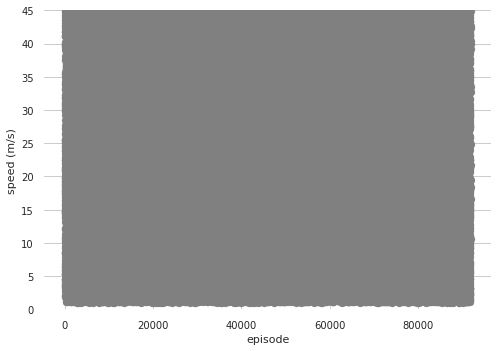

In [80]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=1
end=91855

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['NN_start_speed'].values.tolist()[start:end])

indices = test == 1
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0, 45])
plt.xlabel('episode')
plt.ylabel('speed (m/s)')
ax.grid(True) 
plt.show()

Failures:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


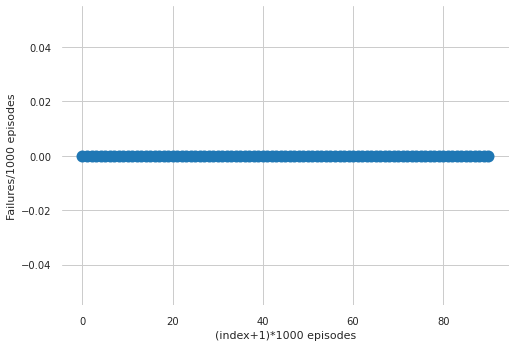

In [79]:
step=1000
failure=[]
fig, ax = plt.subplots()
for i in range(int(data_test['Episode'].shape[0]/step)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.shape[0]-indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   